In [2]:
!pip install --upgrade pip
!pip install pandas
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


## Przygotowanie danych

### Wgranie datasetu

In [3]:
# Sprawdzenie bieżącej ścieżki katalogu roboczego
current_path = os.getcwd()

# Wyświetlenie bieżącej ścieżki
print("Bieżąca ścieżka katalogu roboczego:", current_path)

Bieżąca ścieżka katalogu roboczego: C:\Users\Ewelina


In [4]:
# Ustawienie ścieżki do katalogu zawierającego plik 
os.chdir(r'C:\Users\Ewelina\Desktop\pp2')

In [5]:
# Wczytanie danych z pliku Excel 
df = pd.read_excel('spotify-2023.xlsx')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Vai Lï¿½ï¿½ Em Casa,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &",2,2021,10,22,772,0,263894529.0,7,...,158,G#,Minor,46,62,83,53,0,97,28
1,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",2,2022,11,3,1254,6,263453310.0,26,...,158,C#,Major,65,72,95,31,0,92,5
2,Seu Brilho Sumiu - Ao Vivo,"Israel & Rodolffo, Mari Fernandez",2,2023,3,1,967,5,138517666.0,7,...,154,F#,Major,63,75,92,31,0,91,5
3,Mal Feito - Ao Vivo,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, Hugo & G",2,2022,1,14,971,2,291709698.0,35,...,124,NaN,Minor,73,68,83,55,0,90,7
4,Still With You,Jung Kook,1,2020,6,5,31,39,38411956.0,2,...,88,C#,Minor,53,34,47,9,0,83,4


### Struktura datasetu

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    float64
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      905 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

Opis zmiennych:
0. track_name - nazwa utworu
1. artist(s)_name - nazwa wykonawcy/wykonawcó utworu
2. artist_count - liczba wykonawców/autorów danego utworu
3. released_year - rok wydania utworu
4. released_month - miesiąc wydania utworu
5. released_day - dzień wydania utworu
6. in_spotify_playlists - informacja czy utwór znajduje się na playlistach oraz liczba playlist, na których się znajduje na Spotify
7. in_spotify_charts - informacja, czy utwór znajduje się na listach przebojów na Spotify
8. streams - liczba odtworzeń utworu
9. in_apple_playlists - informacja czy utwór znajduje się na playlistach oraz liczba playlist, na których się znajduje na Apple Music
10. in_apple_charts - informacja, czy utwór znajduje się na listach przebojów na Apple Music
11. in_deezer_playlists - informacja czy utwór znajduje się na playlistach oraz liczba playlist, na których się znajduje na Deezer
12. in_deezer_charts - informacja, czy utwór znajduje się na listach przebojów na Deezer
13. in_shazam_charts - informacja, czy utwór znajduje się na listach przebojów na Shazam
14. bpm - tempo utworu, liczba uderzeń na minutę
15. key - tonacja utworu
15. mode - tryb utworu
17. danceability_% - współczynnik taneczności utworu w %
18. valence_% - współczynnik emocjonalności utworu w % (niski proces - smutny, wysoki proces - wesoły)
19. energy_% - współczynnik energetyczności utworu w %
20. acousticness_% - współczynnik akustyczności utworu w %
21. instrumentalness_% - współczynnik instrumentalności utworu w %
22. liveness_% - współczynnik żywości, obecności elementów koncertowych w nagraniu w %
23. speechiness_% - współczynnik bogactwa litycznego utworu w 


In [7]:
 #Zmienne "Streams" "in_deezer_playlists" oraz "in_shazam_charts" są typu object, zmieniamy je na zmienne numeryczne
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

In [8]:
#Sprawdzamy braki danych
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        48
bpm                      0
key                     96
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
# W przypadku zmiennej "in_shazam_charts" brak danych może oznaczać, że utwór nie osiągnął pozycji w rankingu -> wypełniamy puste pola wartością "Not ranked"
df['in_shazam_charts'].fillna("Not ranked",inplace=True)
# Usuwamy wiersze z brakującą zmienną "key" i "Streams"
df = df.dropna(subset=['key','streams'])
df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [10]:
#Zamiana procentowych zmiennych na liczby po przecinku
procenty = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
for col in procenty:
    df[col] = df[col] / 100.0

In [11]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Vai Lï¿½ï¿½ Em Casa,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &",2,2021,10,22,772,0,263894529.0,7,...,158,G#,Minor,0.46,0.62,0.83,0.53,0.0,0.97,0.28
1,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",2,2022,11,3,1254,6,263453310.0,26,...,158,C#,Major,0.65,0.72,0.95,0.31,0.0,0.92,0.05
2,Seu Brilho Sumiu - Ao Vivo,"Israel & Rodolffo, Mari Fernandez",2,2023,3,1,967,5,138517666.0,7,...,154,F#,Major,0.63,0.75,0.92,0.31,0.0,0.91,0.05
4,Still With You,Jung Kook,1,2020,6,5,31,39,38411956.0,2,...,88,C#,Minor,0.53,0.34,0.47,0.09,0.0,0.83,0.04
5,Oi Balde - Ao Vivo,Zï¿½ï¿½ Neto & Crist,1,2023,2,14,845,2,145458418.0,12,...,108,D,Major,0.67,0.55,0.67,0.60,0.0,0.80,0.05


## Analiza opisowa

### Top 10 utworów w 2023 według liczby odsłuchań (Spotify)

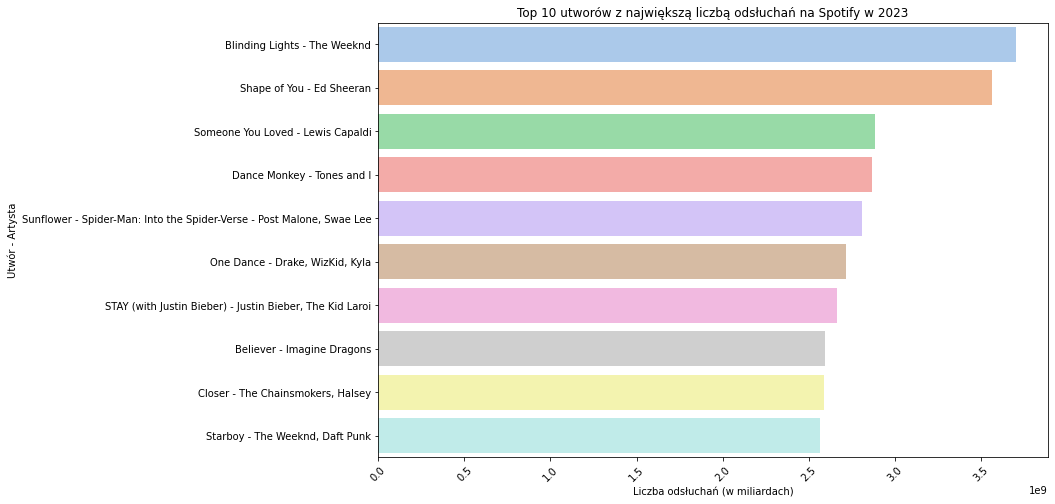

In [12]:
# Konwersja kolumn 'track_name' i 'artist(s)_name' na typ str
df['track_name'] = df['track_name'].astype(str)
df['artist(s)_name'] = df['artist(s)_name'].astype(str)

# Nowa kolumna 'track_artist + track_name', łączącej nazwę utworu i artystę
df['track_artist + track_name'] = df['track_name'] + ' - ' + df['artist(s)_name']

# top 10 utworów z największą liczbą odsłuchań w 2023 roku
top_songs = df[['track_artist + track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

# Wykres
plt.figure(figsize=(12, 8))
sns.barplot(x='streams', y='track_artist + track_name', data=top_songs, palette='pastel')
plt.xlabel('Liczba odsłuchań (w miliardach)')
plt.ylabel('Utwór - Artysta')
plt.title('Top 10 utworów z największą liczbą odsłuchań na Spotify w 2023')
plt.xticks(rotation=45)
plt.show()


##### Po analizie wykresu można zauważyć, że utworem z największą liczbą odsłuchań na Spotify w 2023 roku jest piosenka „Blinding Lights” autorstwa The Weeknd z liczbą 3,5 mld odtworzeń. Dalej w rakingu z nieco mniejszą liczbą znajduje się „Shape of You” Eda Sheerana, a na trzecim miejscu z już nieco mniejszą liczbą odsłuchań – niecałe 3 mln znalazł się utwór „Someone You Loved” Lewisa Capaldi.

### Histogramy

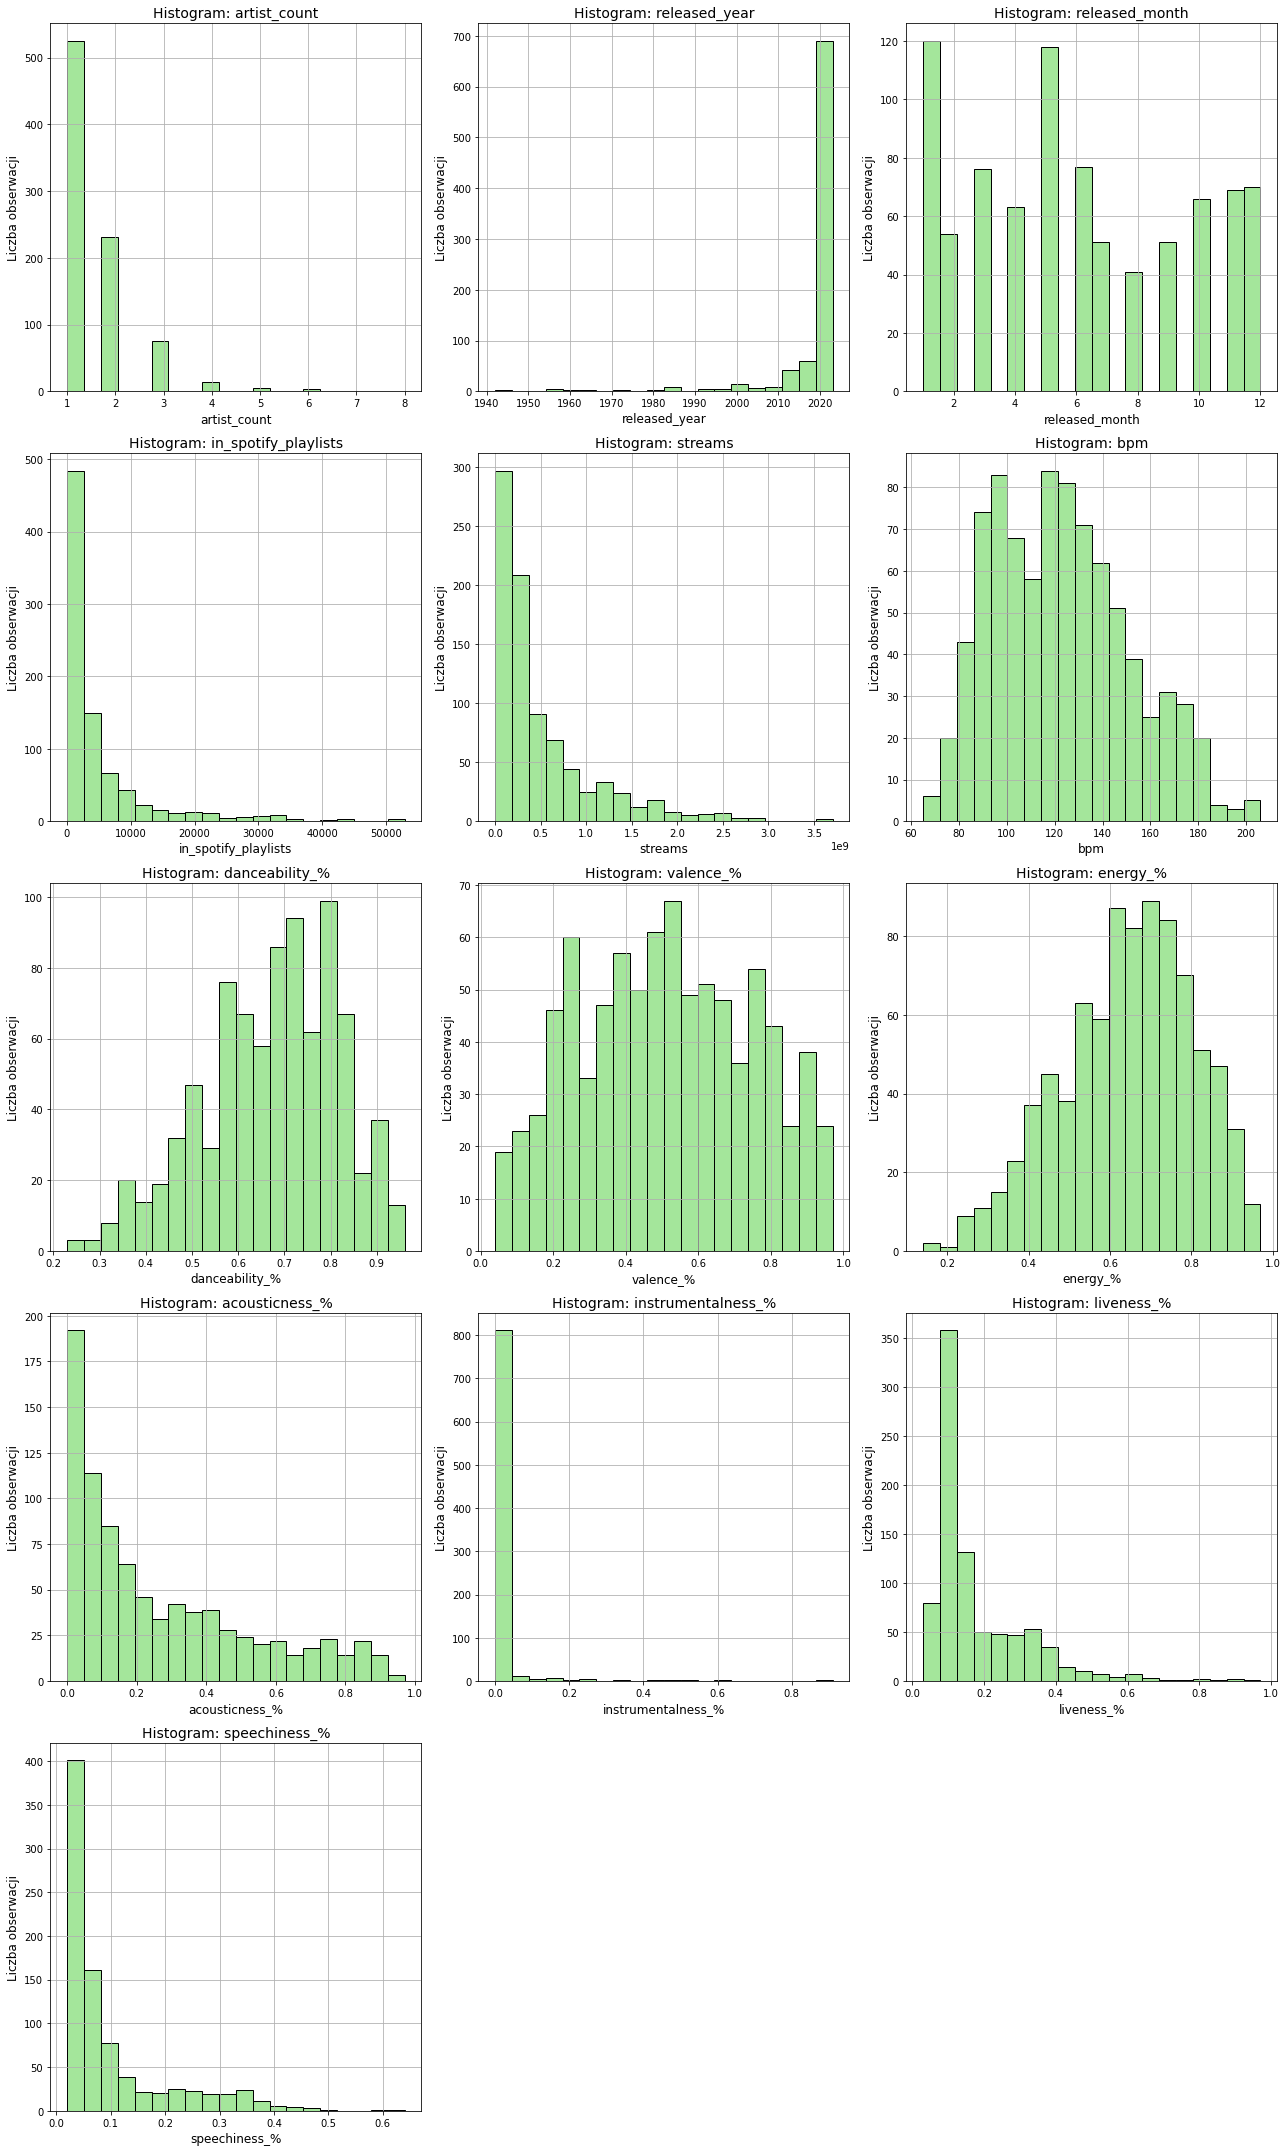

In [13]:
selected_columns = ['artist_count', 'released_year', 'released_month','in_spotify_playlists', 
                    'streams' , 'bpm', 'danceability_%', 'valence_%', 'energy_%', 
                    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

fig, axes = plt.subplots(5, 3, figsize=(18, 30))
axes = axes.flatten()

for i, column in enumerate(selected_columns):
    plt.sca(axes[i])
    
    df[column].hist(bins=20, color='#A4E69B', edgecolor='black')
    
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Liczba obserwacji', fontsize=12)
    plt.title(f'Histogram: {column}', fontsize=14)


for j in range(len(selected_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Przechodząc do analizy histogramów, na pierwszym z nich dotyczącym liczby artystów artist_count można zauważyć, że znaczna większość utworów w zestawieniu posiadała tylko jednego autora, dwóch autorów znajdowało się na o połowie mniejszej liczbie piosenek, natomiast 3 oraz więcej autorów stanowi nieznaczny odsetek utworów zestawienia. 

##### Na diagramie dotyczącym roku wydania utworu released_year można zaobserwować, że znaczna większość utworów z największą liczbą odtworzeni na Spotify została wydana w 2020 roku i późniejszych. Natomiast jedynie niewielki odsetek popularnych utworów 2023 został wydany przez 2020 rokiem. 

##### Na diagramie dotyczącym miesiąca wydania, widać że najpopularniejszymi utworami zostały te wydane w styczniu oraz maju, natomiast najmniejszy potencjał na zdobycie dużej liczby otworzeń miały te wydane w sierpniu, lipcu oraz lutym i wrześniu. 

##### Patrząc na diagram dotyczący liczby playlist, w których znajdują się utwory, można zauważyć że większość z nich znajduje się od 0 do 10 000 playlist, natomiast niewiele z nich należy do większej ilości, może wskazywać to na to, że najpopularniejsze utwory należą do największej ilości playlist.

##### Na diagramie dotyczącym ilości streamów utworów wykazano, że większość piosenek znajdujących się w zestawieniu Spotify z 2023 roku zdobyło mniej niż 0,5 mld odsłuchań, natomiast kilka z najpopularniejszych uzyskiwało od 1 do 3 mld streamów, jedynie niewielki odsetek najpopularniejszych utworów roku 2023 uzyskał 3,5 mld odsłuchań. 
 
##### Na wykresie przedstawiającym uderzenia na minutę (bpm) utworu można zaobserwować, że większość znich ma od 90 do 140 bpm, co oznacza piosenkę dosyć rytmiczną i o nie przesadnie szybkim rytmie. Dużo mniejsza liczba utworów ma bpm mniejszy od 90 oraz większy od 180. 

##### Kolejny diagram odnosi się do dancebility utworu, czyli potencjale do tańczenia. Danceability opisuje w jakim stopniu utwór jest przystosowany do tańca, biorąc pod uwagę jego tempo, rytm, moc bitu oraz ogólną regularność. Na diagramie widać, że duża liczba utworów zestawienia (prawie 300) posiada dancebility na poziomie 70-80%, dancebility na poziomie 90% posiada już tylko niecałe 40 utwrów, natomiast około 100 utorów posiada ten wskaźnik poniżej poziomu 50%. 

##### Diagram valence oposuje, czy dana piosenka ma większą szansę sprawić, że słuchacz będzie szczęśliwy (wyższy wskaźnik valence) czy smutny (niższy wskaźnik valence). Wartości na wykresie są na pierwszy rzut oka podzielone po równo, oznacza to, że połowa z piosenek znajdujących się w zestawieniu ma na celu wzbudzić smutek, natomiast połowa z nich należy do grupy radośniejszych utworów. 

##### Histogram energy reprezentuje percepcyjną miarę intensywności i aktywności. Zazwyczaj, energiczne utwory są szybkie i głośne, dla przykładu death metal postrzegany jest jako wysoko energiczny, natomiast Bach jest oceniany nisko w zakresie wspomnianej skali. 
##### Na diagramie zauważyć można, że utwory znajdujące się w zestawieniu 2023 roku Spotify w większości plasują się w przedziale 60-80% wskaźnika, więc należą raczej do grupy utworów szybszych i głośniejszych, natomiast około 1/4 utworów zestawienia należy do tych spokojniejszych. 

##### Histogram accousticness przedstawia skalę akustyczności utworów, im wyższa jest wartość wskaźnika, tym bardziej utwór jest uznawany jako akustyczny. Piosenki znajdujące się w zestawieniu Spotify 2023 w większości są oznawane za słabo akustyczne i ponad połowa z nich nie przekracza wartości 50%. 

##### Na histogramie instrumentaliness wartości przewidują czy utwór zawiera wokale. Dźwięki jak “ooh” and “aah” są traktowane jako instrumentalne, w tym kontekście. Rap lub słowa wypowiadane w piosence oznaczane są jednoznaczie jako "vocal" . Na histogramie widać, że prawie wszystkie utwory posiadają wartość wskaźnika bliską 0, co oznacza że są to utwory w większości zawierające wokal, a nie złożone jedynie z instrumentalu. 

##### Wskaźnik liveness obecny na przedostatnim histogramie wykrywa obecność publiczności na nagraniu. Liveness mierzy się w skali od 0 (brak publiczności) do 100 (publiczność słyszalna). Według histogramu większość utworów ma niskie wartości liveness, co oznacza że nie są obecne w nich głosy publiczności, a utwór nie został stworzony jako piosenka na żywo. 

##### Ostatni histogram dotyczy wartości speechiness, która wykrywa obecność mówionych słów w utworze. Na histogramie prawie połowa utworów w zestawieniu ma wartość wskaźnika bliską 0, co oznacza że teksty piosenek nie są bogate lirycznie i składają się z niewielkiej ilości tekstu połączonego z instrumentalem. Jedynie niewielka ilość utworów posiada wartość wskaźnika powyżej 60% co oznacza duże bogactwo liryczne. 


### Liczba piosenek w przedziałach lat

In [14]:
min_year = df['released_year'].min()
max_year = df['released_year'].max()

# Liczenie piosenek w poszczególnych przedziałach czasowych
count_before_2010 = df[df['released_year'] < 2010]['released_year'].count()
count_2010_to_2020 = df[(df['released_year'] >= 2010) & (df['released_year'] < 2020)]['released_year'].count()
count_after_2020 = df[df['released_year'] >= 2020]['released_year'].count()

# Wyświetlenie wyników
print(f'Liczba piosenek wydanych przed 2010: {count_before_2010}')
print(f'Liczba piosenek wydanych od 2010 do 2020: {count_2010_to_2020}')
print(f'Liczba piosenek wydanych po 2020: {count_after_2020}')

Liczba piosenek wydanych przed 2010: 59
Liczba piosenek wydanych od 2010 do 2020: 140
Liczba piosenek wydanych po 2020: 657


### 10 najstarszych piosenek w datasecie

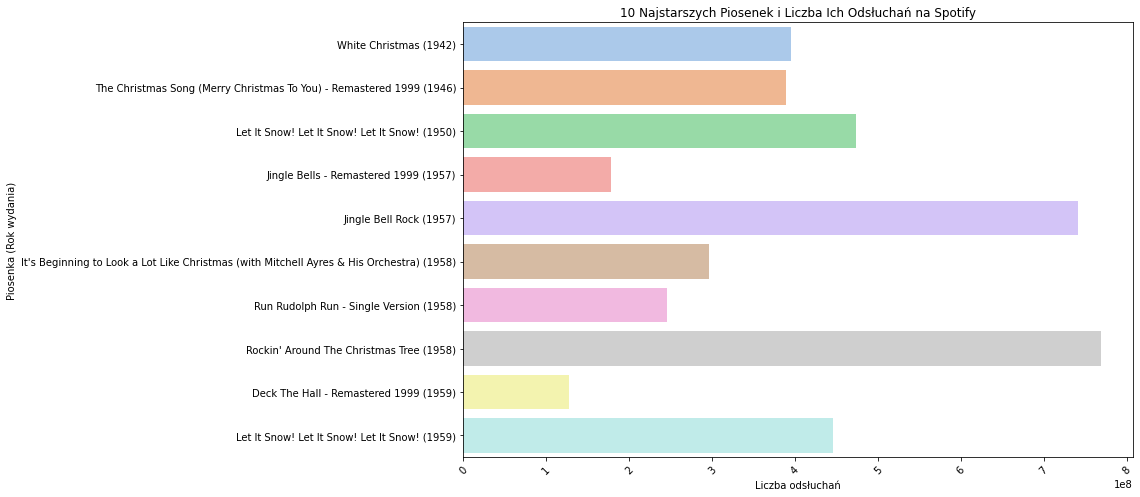

In [15]:
# sort po roku wydania
df_sorted_by_year = df.sort_values(by='released_year')

# 10 najstarszych piosenek
oldest_songs = df_sorted_by_year[['track_name', 'streams', 'released_year']].head(10)

# Uutworzenie kolumny z nazwą piosenki i rokiem
oldest_songs['song_with_year'] = oldest_songs['track_name'] + ' (' + oldest_songs['released_year'].astype(str) + ')'

# Wykres
plt.figure(figsize=(12, 8))
sns.barplot(x='streams', y='song_with_year', data=oldest_songs, palette='pastel')
plt.xlabel('Liczba odsłuchań')
plt.ylabel('Piosenka (Rok wydania)')
plt.title('10 Najstarszych Piosenek i Liczba Ich Odsłuchań na Spotify')
plt.xticks(rotation=45)
plt.show()

##### Najstarsza piosenka w datasecie pochodzi z 1942 roku. Jak widać, nastarsze piosenki, które znalazły się w top +- 1000 utworów 2023 roku to piosenki świateczne.

### Analiza wybranych zmiennych w czasie 

#### Trend zmiennej acousticness w latach

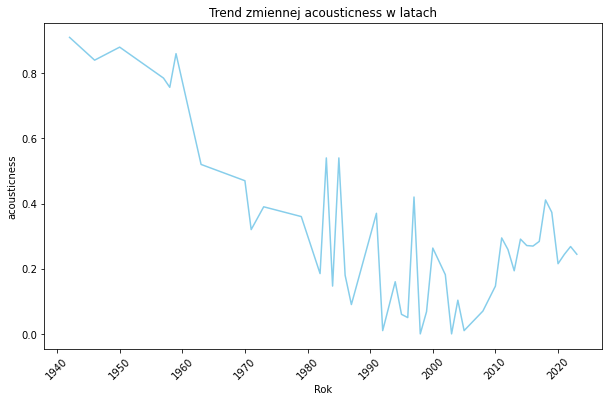

In [16]:
average_acousticness_by_year = df.groupby('released_year')['acousticness_%'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_acousticness_by_year.index, y=average_acousticness_by_year.values, color='#87CEEB')
plt.xlabel('Rok')
plt.ylabel('acousticness')
plt.title('Trend zmiennej acousticness w latach')
plt.xticks(rotation=45)
plt.show()

#### Trend zmiennej danceability w latach

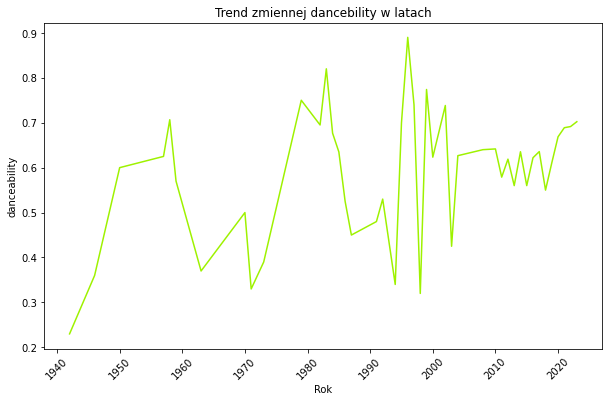

In [17]:
average_danceability_by_year = df.groupby('released_year')['danceability_%'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_danceability_by_year.index, y=average_danceability_by_year.values, color='#9ef200')
plt.xlabel('Rok')
plt.ylabel('danceability')
plt.title('Trend zmiennej dancebility w latach')
plt.xticks(rotation=45)
plt.show()

#### Trend zmiennej energy w latach

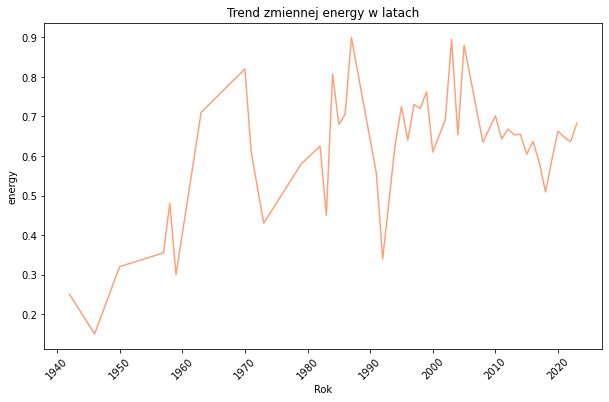

In [18]:
average_energy_by_year = df.groupby('released_year')['energy_%'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_energy_by_year.index, y=average_energy_by_year.values, color='#FFA07A')
plt.xlabel('Rok')
plt.ylabel('energy')
plt.title('Trend zmiennej energy w latach')
plt.xticks(rotation=45)
plt.show()

# Macierz korelacji zmiennych

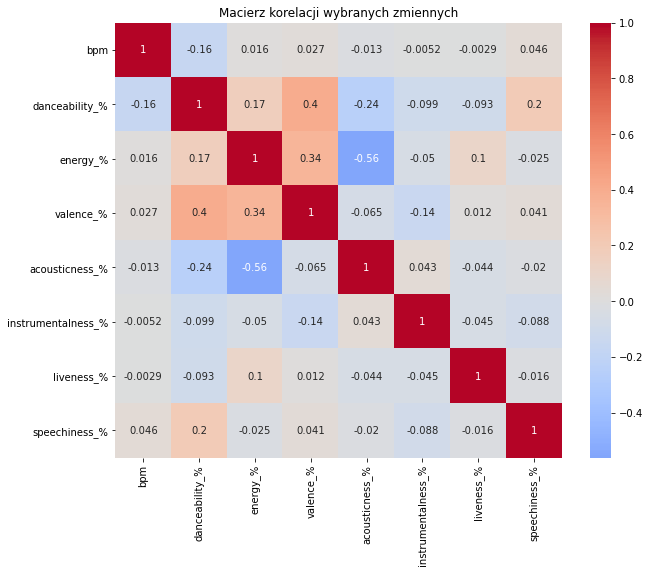

In [19]:
correlation_matrix = df[['bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Macierz korelacji wybranych zmiennych')
plt.show()

##### - Macierz korelacji wskazuje silnie ujemną korelację między zmiennymi acousticness oraz energy, co oznacza, że im wyższa wartość zmiennej acousticness, tym niższa będzie wartość energy.

##### - Dosyć znaczna ujemna korelacja jest także między zmiennymi acousticness oraz dancebility oraz dancebility i bpm, a także dla zmiennych instrumentalness i valence.

##### - Dosyć silna korelacja zachodzi natomiast między zmienną valence i dencebility, co oznacza że im większa wartość zmiennej valence (wskaźnik opisujący emocjonalność piosenki, gdzie wyższy jej wskaźnik będzie wskazywał na bardziej radosny utwór, a niska wartość na smutny), tym większa też staje się wartość dancebility.

##### - Dosyć zmacząco koreluje także zmienna valence ze zmienną energy.

##### - Korelacja zachodzi także między zmiennymi energy i dencebility oraz dancebility i speechiness.

# Macierz koleracji zmiennych dot. platform streamingowych

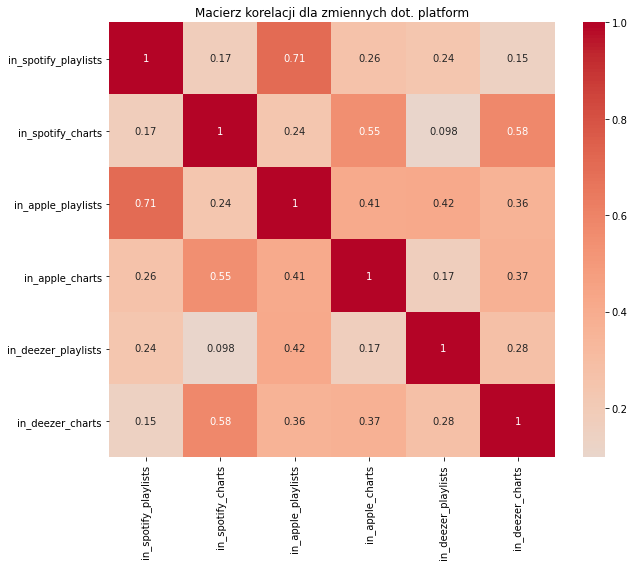

In [20]:
correlation_matrix_cross = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cross, annot=True, cmap='coolwarm', center=0)
plt.title('Macierz korelacji dla zmiennych dot. platform')
plt.show()

##### - Macierz korelacji dot. platform wskazuje bardzo silną korelację między zmienną in_apple_playlists oraz in_spotify_playlists co może oznaczać, że piosenki znajdujące się w wielu playlistach na Spotify, znajdują się także w wielu playlistach na Apple Music.

##### - Silnie korelują ze sobą także in_spotify_charts oraz in_deezer_charts, co może wskazywać, że utwory znajdujące się w listach przebojów na Spotify, znajdują się w także w listach przebojów na Deezer. Podobna sytuacja dotyczy zmiennych in_spotify_charts oraz in_apple charts.

##### - Dosyć silnie korelują też zmienna in_apple_playlists ze zmiennymi in_apple_charts oraz in_deezer_playlists co wskazuje na to, że utwory znajdujące się w playlistach na Apple Music często znajdują się także listach przebojów Apple Music, a także w wielu playlistach na Deezer.

##### - Najsłabszą okazała się korelacja między zmiennymi in_deezer_playlists i in_spotify_charts, co wskazuje na słaby związek między zmiennymi i może oznaczać że rzadko utwory znajdujące się w playlistach na Deezer znajdują się na listach przebojów na Spotify.

## Wykresy zależności liczby odsłuchań od analizowanych zmiennych

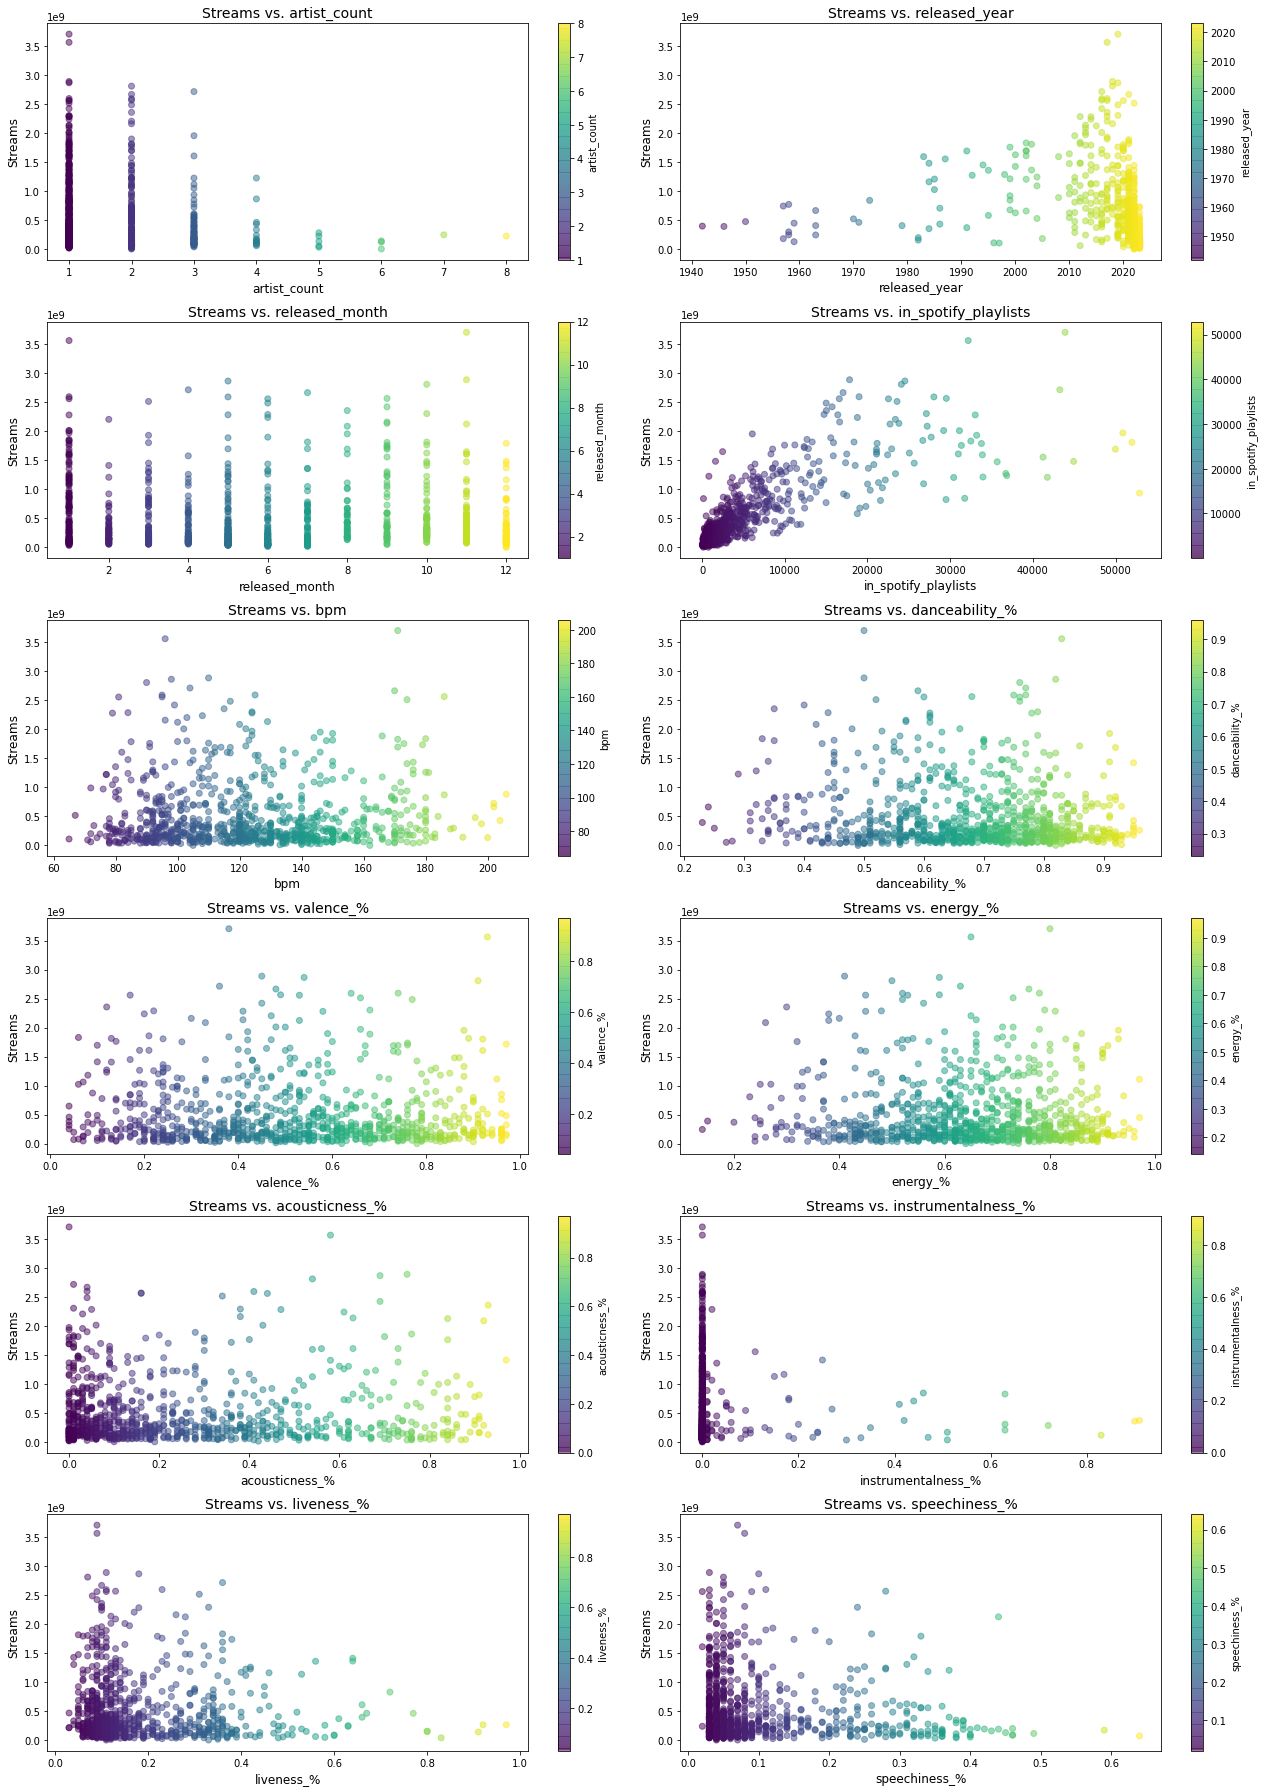

In [21]:
#Wybór zmiennych
columns_streamsvs = ['artist_count', 'released_year', 'released_month','in_spotify_playlists', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

#Strkutura/wygląd wykresu
fig, axes = plt.subplots(6, 2, figsize=(18, 25))
axes = axes.flatten()
colormap = plt.cm.get_cmap('viridis')

#Wykres
for i, column in enumerate(columns_streamsvs):
    plt.sca(axes[i])
    scatter = plt.scatter(df[column], df['streams'], c=df[column], cmap=colormap, alpha=0.5)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Streams', fontsize=12)
    plt.title(f'Streams vs. {column}', fontsize=14)
    plt.colorbar(scatter, label=column)

for j in range(len(columns_streamsvs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### - Zgodnie z histogramem – większość wysoko streamowanych piosenek ma 1 artystę, ale też i 2
##### - Najwięcej odsłuchań mają stosunkowo nowe piosenki
##### - Brak widocznego trendu dla miesiąca
##### - Widoczna pozytywna zależność liczby odsłuchań i liczby playlist, w której znajduje się utwór
##### - Piosenki o szybkim i umiarkowanym tempie mają najwięcej odsłuchań
##### - Lubimy piosenki "do tańca" i energiczne.
##### - Lubimy piosenki o różnej emocjonalności
##### - Wolimy piosenki o zróżnicowanym procensie aktustyczności (z dominacją mniejszej)
##### - W topce utworów dominują piosenki nagrane w studiu, nie w wersji live
##### - Definitywnie wolimy piosenki, które są mało instumentalne, ale tym samym bez nadmiernie dużej ilości tekstu

In [22]:
#Korelacja zmiennej streams oraz in_spotify_playlist
correlation = df['streams'].corr(df['in_spotify_playlists'])
print(correlation )

0.7877156114893785


## Analiza zmiennej Key

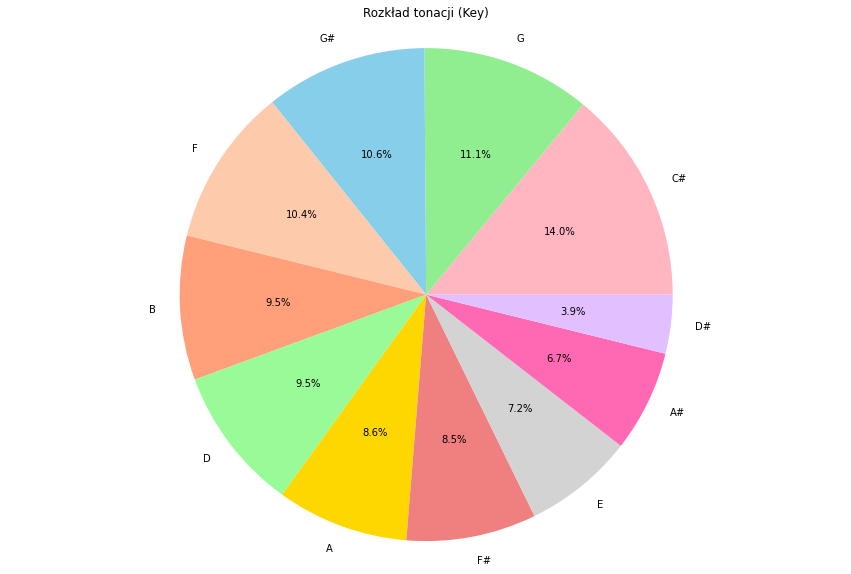

In [23]:
key_counts = df['key'].value_counts()
custom_colors = ['#FFB6C1', '#90EE90', '#87CEEB', '#FDCBAC', '#FFA07A', '#98FB98',
                 '#FFD700', '#F08080', '#D3D3D3', '#FF69B4', '#E2C0FF',]

# Tworzenie wykresu kołowego
plt.figure(figsize=(15, 10))
plt.pie(key_counts, labels=key_counts.index, colors=custom_colors, autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Rozkład tonacji (Key)')
plt.show()

#### Najwięcej utworów jest w tonacji Cis

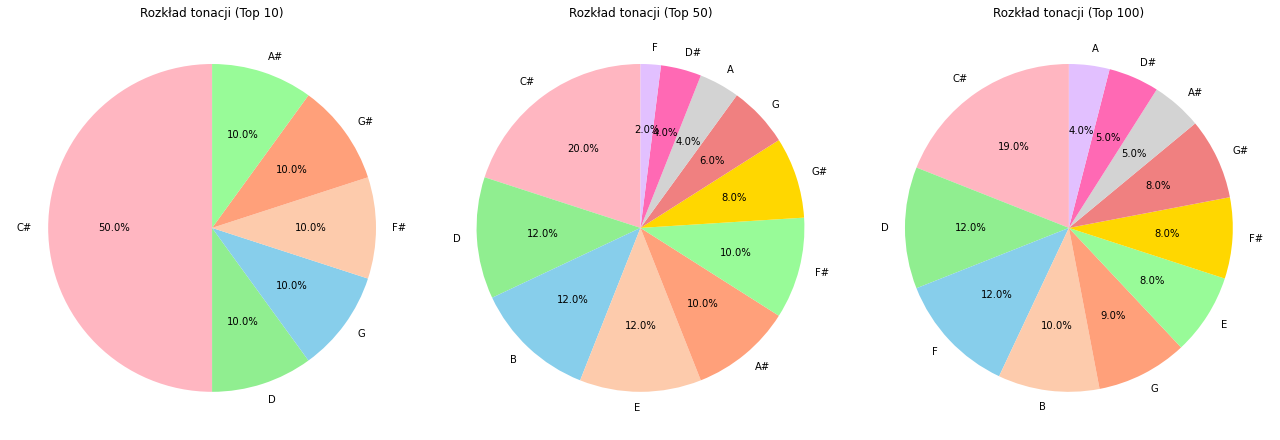

In [24]:
# top 10, top 50 i top 100 piosenek według liczby odsłuchań
top_10_songs = df.nlargest(10, 'streams')
top_50_songs = df.nlargest(50, 'streams')
top_100_songs = df.nlargest(100, 'streams')
keys_top_10 = top_10_songs['key'].value_counts()
keys_top_50 = top_50_songs['key'].value_counts()
keys_top_100 = top_100_songs['key'].value_counts()

#Wykresy
plt.figure(figsize=(18, 6))

plt.subplot(131)  
plt.pie(keys_top_10, labels=keys_top_10.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Rozkład tonacji (Top 10)')

plt.subplot(132)  
plt.pie(keys_top_50, labels=keys_top_50.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Rozkład tonacji (Top 50)')

plt.subplot(133)  
plt.pie(keys_top_100, labels=keys_top_100.index, autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.title('Rozkład tonacji (Top 100)')

plt.tight_layout()
plt.show()

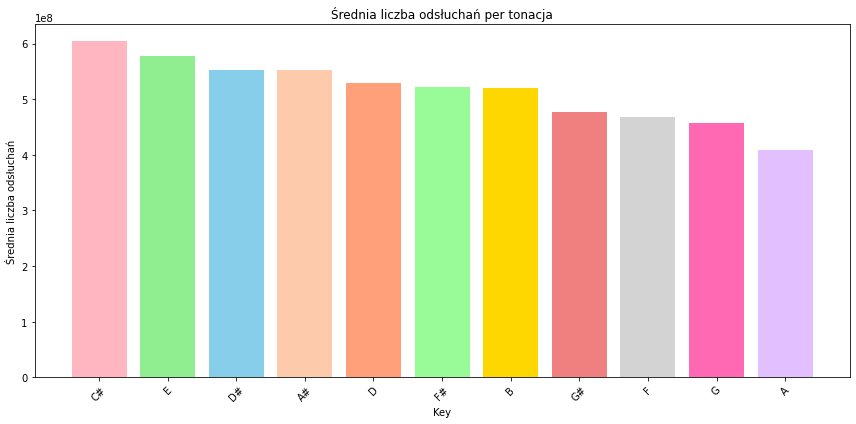

In [25]:
# Grupowanie danych
average_streams_per_key = df.groupby('key')['streams'].mean().reset_index()
# Sortowanie 
average_streams_per_key = average_streams_per_key.sort_values(by='streams', ascending=False)

# Przygotowanie danych do wykresu
keys = average_streams_per_key['key']
average_streams = average_streams_per_key['streams']

# Tworzenie wykresu słupkowego
plt.figure(figsize=(12, 6))
plt.bar(keys, average_streams, color=custom_colors)  
plt.xlabel('Key')
plt.ylabel('Średnia liczba odsłuchań')
plt.title('Średnia liczba odsłuchań per tonacja')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analiza zmiennej Mode

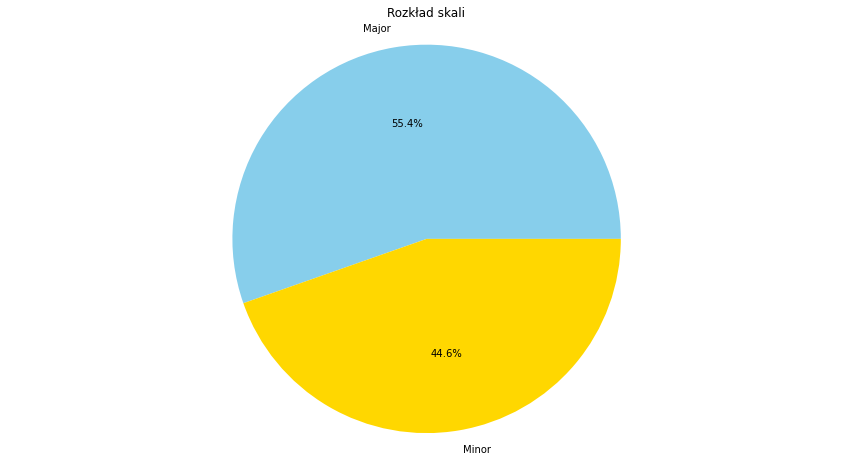

In [26]:
# Grupowanie danych po zmiennej mode
mode_counts = df['mode'].value_counts()

custom_colors = ['#87CEEB','#FFD700']

# Tworzenie wykresu kołowego
plt.figure(figsize=(15, 8))
plt.pie(mode_counts, labels=mode_counts.index, colors=custom_colors, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Rozkład skali')
plt.show()

#### Najwięcej utworów jest w skali durowej (wesołej)

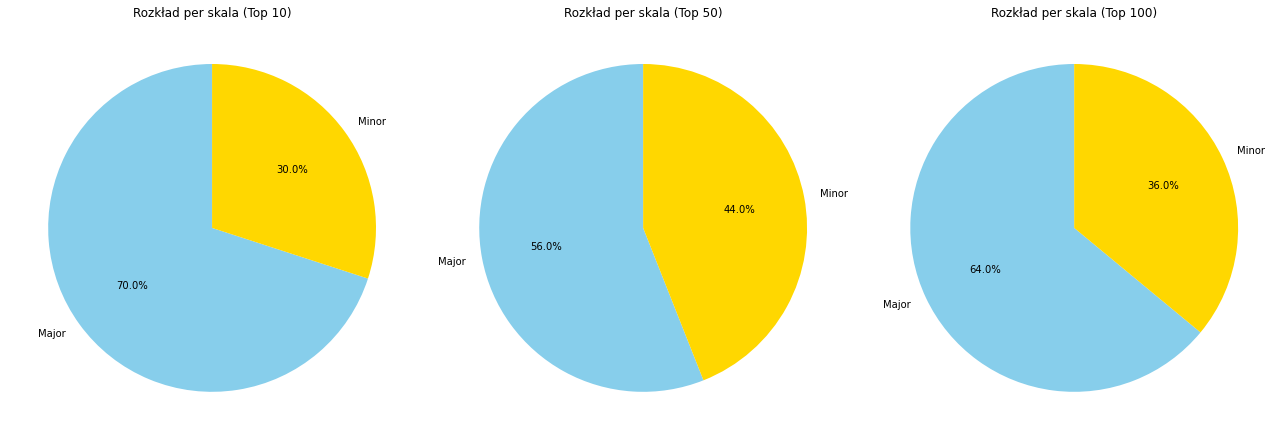

In [27]:

mode_top_10 = top_10_songs['mode'].value_counts()
mode_top_50 = top_50_songs['mode'].value_counts()
mode_top_100 = top_100_songs['mode'].value_counts()

custom_colors = ['#FFB6C1', '#FFD700']

plt.figure(figsize=(18, 6))

plt.subplot(131)  
plt.pie(mode_top_10, labels=mode_top_10.index, autopct='%1.1f%%', startangle=90, colors=['#87CEEB','#FFD700'])
plt.title('Rozkład per skala (Top 10)')

plt.subplot(132)  
plt.pie(mode_top_50, labels=mode_top_50.index, autopct='%1.1f%%', startangle=90, colors=['#87CEEB','#FFD700'])
plt.title('Rozkład per skala (Top 50)')

plt.subplot(133)  
plt.pie(mode_top_100, labels=mode_top_100.index, autopct='%1.1f%%', startangle=90, colors=['#87CEEB','#FFD700'])
plt.title('Rozkład per skala (Top 100)')

plt.tight_layout()
plt.show()

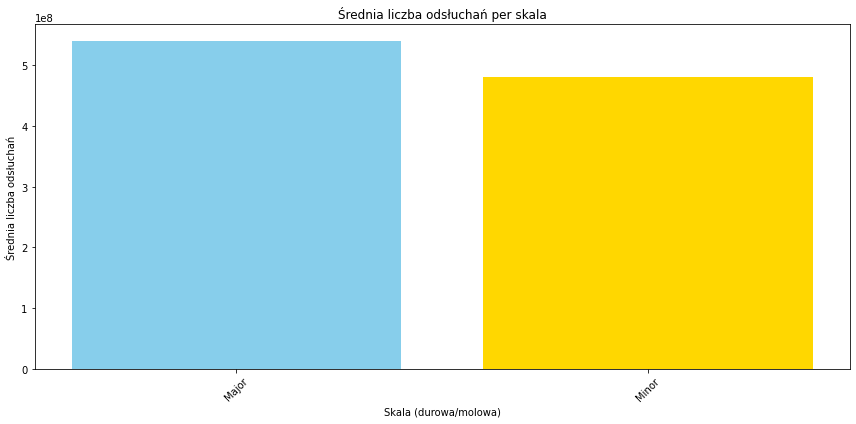

In [28]:
# Grupowanie danych 
average_streams_per_mode = df.groupby('mode')['streams'].mean().reset_index()

# Sortowanie 
average_streams_per_mode= average_streams_per_mode.sort_values(by='streams', ascending=False)

# Przygotowanie danych do wykresu
modes = average_streams_per_mode['mode']
average_streams = average_streams_per_mode['streams']

# Wykres
plt.figure(figsize=(12, 6))
plt.bar(modes, average_streams, color=['#87CEEB','#FFD700']) 
plt.xlabel('Skala (durowa/molowa)')
plt.ylabel('Średnia liczba odsłuchań')
plt.title('Średnia liczba odsłuchań per skala')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Model regresji liniowej

In [47]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.stats import diagnostic
from scipy.stats import normaltest
import statsmodels.stats.api as sms

In [32]:
# Rozbicie zmiennych kategorycznych na zmienne binarne

key_dummies = pd.get_dummies(df['key'], prefix='key')

mode_dummies = pd.get_dummies(df['mode'], prefix='mode')

df = pd.concat([df, key_dummies, mode_dummies], axis=1)

In [33]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 952
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   track_name                 856 non-null    object 
 1   artist(s)_name             856 non-null    object 
 2   artist_count               856 non-null    int64  
 3   released_year              856 non-null    int64  
 4   released_month             856 non-null    int64  
 5   released_day               856 non-null    int64  
 6   in_spotify_playlists       856 non-null    int64  
 7   in_spotify_charts          856 non-null    int64  
 8   streams                    856 non-null    float64
 9   in_apple_playlists         856 non-null    int64  
 10  in_apple_charts            856 non-null    int64  
 11  in_deezer_playlists        856 non-null    float64
 12  in_deezer_charts           856 non-null    int64  
 13  in_shazam_charts           856 non-null    object 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,Vai Lï¿½ï¿½ Em Casa,"Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &",2,2021,10,22,772,0,263894529.0,7,...,0,0,0,0,0,0,0,1,0,1
1,Bombonzinho - Ao Vivo,"Israel & Rodolffo, Ana Castela",2,2022,11,3,1254,6,263453310.0,26,...,1,0,0,0,0,0,0,0,1,0
2,Seu Brilho Sumiu - Ao Vivo,"Israel & Rodolffo, Mari Fernandez",2,2023,3,1,967,5,138517666.0,7,...,0,0,0,0,0,1,0,0,1,0
4,Still With You,Jung Kook,1,2020,6,5,31,39,38411956.0,2,...,1,0,0,0,0,0,0,0,0,1
5,Oi Balde - Ao Vivo,Zï¿½ï¿½ Neto & Crist,1,2023,2,14,845,2,145458418.0,12,...,0,1,0,0,0,0,0,0,1,0


In [34]:
#Skalowanie zmiennej streams 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['streams'] = scaler.fit_transform(df[['streams']])

## Model 1 - analiza ze wszystkimi zmiennymi

In [35]:
# Definiujemy zmienne objaśniające (X) i zmienną objaśnianą (Y)
X = df[['released_year', 'released_month','artist_count', 'in_spotify_playlists','bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%' , 'key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor' ]]
Y = df[['streams']]
X = sm.add_constant(X)

# Model regresji liniowej
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     66.52
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          1.02e-170
Time:                        16:34:07   Log-Likelihood:                 832.03
No. Observations:                 856   AIC:                            -1616.
Df Residuals:                     832   BIC:                            -1502.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.2909 

##### R-squared (R^2): Współczynnik determinacji wynosi 0.648, co oznacza, że model wyjaśnia około 64.8% zmienności zmiennej objaśnianej (streams). 

##### Adj. R-squared (Skorygowany R^2): Skorygowany współczynnik determinacji wynosi 0.638, co uwzględnia liczbę zmiennych objaśniających w modelu. Jest to również umiarkowanie wysoki poziom wyjaśnienia.

##### F-statistic: Wynosi 66.52, a p-wartość (Prob (F-statistic)) wynosi 1.02e-170. Test F-statystyczny wskazuje, że przynajmniej jedna zmienna objaśniana w modelu ma istotny wpływ na zmienną objaśnianą. 

#### Zmienne nieistotne statysytcznie przy p value 5%: bpm, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_$

In [36]:
#Usuwamy zmienne nieistotne statystycznie z modelu

# Definiujemy zmienne objaśniające (X) i zmienną objaśnianą (Y)
X1_2 = df[['released_year', 'released_month','artist_count', 'in_spotify_playlists', 'speechiness_%' , 'key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor' ]]
Y1_2 = df[['streams']]
X1_2 = sm.add_constant(X1_2)

# Model regresji liniowej
model1_2 = sm.OLS(Y1_2, X1_2).fit()
print(model1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     93.42
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          9.10e-174
Time:                        16:34:11   Log-Likelihood:                 823.30
No. Observations:                 856   AIC:                            -1613.
Df Residuals:                     839   BIC:                            -1532.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9422 

##### R-squared (R^2): Współczynnik determinacji wynosi 0.640, co oznacza, że model wyjaśnia około 64.0% zmienności zmiennej objaśnianej (streams). Jest to umiarkowanie wysoki poziom wyjaśnienia, co sugeruje, że model jest stosunkowo skuteczny w przewidywaniu zmiennej objaśnianej na podstawie zmiennych objaśniających.

##### Adj. R-squared (Skorygowany R^2): Skorygowany współczynnik determinacji wynosi 0.634, uwzględniając liczbę zmiennych objaśniających w modelu. Jest to również umiarkowanie wysoki poziom wyjaśnienia.

##### F-statistic: Wynosi 93.42, a p-wartość (Prob (F-statistic)) wynosi 9.10e-174. Test F-statystyczny wskazuje, że przynajmniej jedna zmienna objaśniana w modelu ma istotny wpływ na zmienną objaśnianą. 

### Sprawdzamy, czy mogliśmy wykluczyć wszystkie nieistotne zmienne łącznie, czyli czy zmienne nieistotne były łącznie nieistotne. 

#### Test ALNOVA - łączna nieistotność zmiennych
##### H0 - Zmienne są łącznie nieistotne (żadna z usunietych zmiennych nie ma isotnego wpływu na model)
##### H1 - Conajmniej jedna zmienna z usuniętych ma istotny wpływ na model

In [37]:
# Przeprowadzenie testu F porównującego modele
anova_results = anova_lm(model1_2, model)

# Wyświetlenie wyników testu
print(anova_results)

   df_resid       ssr  df_diff  ss_diff        F    Pr(>F)
0     839.0  7.321363      0.0      NaN      NaN       NaN
1     832.0  7.173613      7.0  0.14775  2.44802  0.017313


### Statystyka P-value jest mniejsza od poziomu istotności 5%, oznacza to, że odrzucamy H0! W związku z tym, rezygnujemy z modelu "model1_2". Poprzez usuwanie pojedyńczych zmiennych nieistotnych z pierwotnego modelu, podjęto decyzje o pozostawienu zmiennej "acousticness_%", która okazała się być statystycznie istotna.

In [38]:
# Definiujemy zmienne objaśniające (X) i zmienną objaśnianą (Y)
X1_3 = df[['released_year', 'released_month','artist_count', 'in_spotify_playlists', 'acousticness_%', 'speechiness_%' , 'key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor' ]]
Y1_3 = df[['streams']]
X1_3 = sm.add_constant(X1_3)

# Model regresji liniowej
model1_3 = sm.OLS(Y1_3, X1_3).fit()
print(model1_3.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     89.61
Date:                Wed, 24 Jan 2024   Prob (F-statistic):          4.14e-175
Time:                        16:34:33   Log-Likelihood:                 828.85
No. Observations:                 856   AIC:                            -1622.
Df Residuals:                     838   BIC:                            -1536.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.2225 

### Ponownie wykonujemy test ALNOVA. Tym razem statystyka P-value jest większa od poziomu istotności 5% - nie mamy podstaw do odrzuceniu hipotezy H0 o łącznej nieistotności zmiennych.

#### Test ANOVA - łączna nieistotność zmiennych
##### H0 - Zmienne są łącznie nieistotne (żadna z usunietych zmiennych nie ma isotnego wpływu na model)
##### H1 - Conajmniej jedna zmienna z usuniętych ma istotny wpływ na model

In [48]:
# Przeprowadzenie testu Anova porównującego modele
anova_results = anova_lm(model1_3, model)

# Wyświetlenie wyników testu
print(anova_results)

   df_resid       ssr  df_diff  ss_diff         F    Pr(>F)
0     838.0  7.227103      0.0      NaN       NaN       NaN
1     832.0  7.173613      6.0  0.05349  1.033963  0.401639


### Inne testy walidacyjne

Test normalności reszt:

Testuje, czy reszty modelu regresji są rozkładem normalnym.
Hipoteza zerowa (H0): Reszty pochodzą z rozkładu normalnego.
Kod w Pythonie (wykorzystując bibliotekę scipy):

In [49]:
_, p_value = normaltest(model1_3.resid)
if p_value < 0.05:
    print("Reszty nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na to, że reszty nie pochodzą z rozkładu normalnego.")

Reszty nie pochodzą z rozkładu normalnego.


Test homoskedastyczności:
Sprawdza, czy wariancja reszt jest stała wzdłuż wartości przewidywanych.
Hipoteza zerowa (H0): Wariancja reszt jest stała (brak heteroskedastyczności).

In [50]:
het_test = sms.het_goldfeldquandt(model1_3.resid, model.model.exog)
if het_test[1] < 0.05:
    print("Wariancja reszt nie jest stała (heteroskedastyczność).")
else:
    print("Brak dowodów na heteroskedastyczność.")

Wariancja reszt nie jest stała (heteroskedastyczność).


Test autokorelacji reszt:

Sprawdza, czy reszty są autokorelowane (korelacja między resztami w różnych obserwacjach).
Hipoteza zerowa (H0): Brak autokorelacji reszt.

In [51]:
ljung_box_test = diagnostic.acorr_ljungbox(model1_3.resid, lags=1)
if ljung_box_test[1][0] < 0.05:
    print("Wykryto autokorelację reszt.")
else:
    print("Brak dowodów na autokorelację reszt.")

Brak dowodów na autokorelację reszt.


C:\Users\Ewelina\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


##  Wnioski dla modelu 1

Skorygowany współczynnik determinacji (R^2) wynosi 0.634 -> model wyjaśnia ok. 63% zmienności Y 

Ujemna zmienna stała -> ujemna liczba streamów?

Wysoka korelacja zmiennej Y od zmiennej “in_spotify_playlist”, ale stosunkowo niski współczynnik (bliski 0) -> która zmienna wpływa na którą?

Występuje heteroskedastyczność, reszty w modelu nie mają rozkładu normalnego.


Jeśli mimo to przyjęlibyśmy model

- Każdy dodatkowy artysta zmniejsza "streams" o 0.0083 jednostki
- Każdy dodatkowy rok wydania utworu zwiększa przewidywane "streams" o 0.0018 jednostki,
- Każde dodatkowe wystąpienie w playlistach zwiększa przewidywane "streams" o 1.626 x 10^-5 jednostki
- Wzrost wartości "acousticness%" o 1% zwiększa przewidywane "streams" o 0.0424 jednostki
- Wzrost wartości "speechiness%" o 1% zmniejsza przewidywane "streams" o 0.0782 jednostki
- Ujemne współczynniki dla Key oraz Mode


## Model 2 - wykluczamy zmienną in_spotify_playlists

In [52]:
# Definiujemy zmienne objaśniające (X) i zmienną objaśnianą (Y)
X2 = df[['released_year', 'released_month','artist_count','bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%' , 'key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor' ]]
Y2 = df[['streams']]
X2 = sm.add_constant(X2)

# Model regresji liniowej
model2 = sm.OLS(Y2, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     3.870
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           7.51e-09
Time:                        16:36:35   Log-Likelihood:                 427.11
No. Observations:                 856   AIC:                            -808.2
Df Residuals:                     833   BIC:                            -698.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1511      0

#### R-squared (R-kwadrat): R-kwadrat wynosi 0.093, co oznacza, że tylko 9.3% zmienności zmiennej streams jest wyjaśniane przez zmienne objaśniające w modelu. Pozostałe 90.7% zmienności pozostaje niewyjaśnione.

#### Adj. R-squared (Skorygowany R-kwadrat): Skorygowany R-kwadrat uwzględnia liczbę zmiennych objaśniających w modelu i jest bardziej odpowiedni do porównywania modeli z różną liczbą zmiennych. Wartość skorygowanego R-kwadratu wynosi 0.069, co sugeruje, że nawet po uwzględnieniu liczby zmiennych objaśniających w modelu, tylko 6.9% zmienności zmiennej streams jest wyjaśniane przez te zmienne.

#### F-statistic (Statystyka F): Statystyka F jest testem statystycznym, który ocenia ogólną istotność modelu. Wartość statystyki F wynosi 3.870, a p-wartość (Prob (F-statistic)) wynosi 7.51e-09. Mała p-wartość oznacza, że co najmniej jedna zmienna objaśniająca w modelu ma istotny wpływ na zmienną streams. 

In [53]:
#Usuwamy zmienne nieistotne statystycznie z modelu

# Definiujemy zmienne objaśniające (X) i zmienną objaśnianą (Y)
X2_2 = df[['released_year','artist_count', 'speechiness_%' , 'key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor' ]]
Y2_2 = df[['streams']]
X2_2 = sm.add_constant(X2_2)

# Model regresji liniowej
model2_2 = sm.OLS(Y2_2, X2_2).fit()
print(model2_2.summary())

                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     5.364
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           6.96e-10
Time:                        16:36:36   Log-Likelihood:                 422.06
No. Observations:                 856   AIC:                            -814.1
Df Residuals:                     841   BIC:                            -742.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.0337      0.629      6.416

#### R-squared (R-kwadrat): R-kwadrat wynosi 0.082, co oznacza, że tylko 8.2% zmienności zmiennej streams jest wyjaśniane przez zmienne objaśniające w modelu. Pozostałe 91.8% zmienności pozostaje niewyjaśnione.

#### Adj. R-squared (Skorygowany R-kwadrat):  Wartość skorygowanego R-kwadratu wynosi 0.067, co sugeruje, że nawet po uwzględnieniu liczby zmiennych objaśniających w modelu, tylko 6.7% zmienności zmiennej streams jest wyjaśniane przez te zmienne.

#### F-statistic (Statystyka F): Statystyka F jest testem statystycznym, który ocenia ogólną istotność modelu. Wartość statystyki F wynosi 5.364, a p-wartość (Prob (F-statistic)) wynosi 6.96e-10. Mała p-wartość oznacza, że co najmniej jedna zmienna objaśniająca w modelu ma istotny wpływ na zmienną streams. 

Test ANOVA - łączna nieistotność zmiennych

H0 - Zmienne są łącznie nieistotne (żadna z usunietych zmiennych nie ma isotnego wpływu na model)

H1 - Conajmniej jedna zmienna z usuniętych ma istotny wpływ na model


In [54]:
# Przeprowadzenie testu anova porównującego modele
anova_results = anova_lm(model2_2, model2)

# Wyświetlenie wyników testu
print(anova_results)

   df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0     841.0  18.695142      0.0       NaN       NaN       NaN
1     833.0  18.476193      8.0  0.218949  1.233914  0.275817


### P-value jest większe od poziomu istotności -> brak podstaw do odrzucenia H0.

### Inne testy walidacyjne modelu

Test normalności reszt:

Testuje, czy reszty modelu regresji są rozkładem normalnym.
Hipoteza zerowa (H0): Reszty pochodzą z rozkładu normalnego.

In [55]:
_, p_value = normaltest(model2_2.resid)
if p_value < 0.05:
    print("Reszty nie pochodzą z rozkładu normalnego.")
else:
    print("Brak dowodów na to, że reszty nie pochodzą z rozkładu normalnego.")

Reszty nie pochodzą z rozkładu normalnego.


Test homoskedastyczności:
Sprawdza, czy wariancja reszt jest stała wzdłuż wartości przewidywanych.
Hipoteza zerowa (H0): Wariancja reszt jest stała (brak heteroskedastyczności).

In [56]:
het_test = sms.het_goldfeldquandt(model2_2.resid, model.model.exog)
if het_test[1] < 0.05:
    print("Wariancja reszt nie jest stała (heteroskedastyczność).")
else:
    print("Brak dowodów na heteroskedastyczność.")

Wariancja reszt nie jest stała (heteroskedastyczność).


Test autokorelacji reszt:

Sprawdza, czy reszty są autokorelowane (korelacja między resztami w różnych obserwacjach).
Hipoteza zerowa (H0): Brak autokorelacji reszt.

In [57]:
ljung_box_test = diagnostic.acorr_ljungbox(model2_2.resid, lags=1)
if ljung_box_test[1][0] < 0.05:
    print("Wykryto autokorelację reszt.")
else:
    print("Brak dowodów na autokorelację reszt.")

Wykryto autokorelację reszt.


C:\Users\Ewelina\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


## Wnioski dla modelu 2

Skorygowany współczynnik determinacji (R^2) wynosi 0.067 -> model wyjaśnia tylko ok. 7% zmienności Y 
Występuje heteroskedastyczność, autokorelacja reszt, reszty w modelu nie mają rozkładu normalnego.

Jeśli mimo to przyjęlibyśmy model:

- Każdy dodatkowy artysta w utworze zmniejsza liczbę odsłuchań o 0.0177 jednostki
- Wzrost wartości "speechiness%" o 1% zmniejsza przewidywane "streams" o 0.1189 jednostki
- Największy współczynnik przy zmiennych dot. tonacji znajduje się przy C# (0.3931), najmniejszy przy A (0.3378)
- Współczynnik przy skali durowej (2.0206) jest odrobinę większy niż przy stali molowej (2.0130)
- Ujemny wpływ zmiennej “released_year”


# Podsumowanie

Próba stworzenia modelu regresji liniowej, który poprawnie przewidywałby liczbę odsłuchań piosenek na podstawie analizowanych zmiennych zakończyła się niepowodzeniem. Modele nie przeszły podstawowych testów, dodatkowo występuje w nich problem współliniowości (współzależności) zmiennych objaśniających oraz niepoprawna forma funkcyjna. Być może pominięto w modelu zmienne, które mają znaczący wpływ na model (warto zauważyć, że model nie uwzględał autora piosenki). Być może pomocne okazałoby się zwiększenie liczby obserwacji lub należałoby podjąć próbę dopasowania zmiennych do modelu liniowego (brak liniowej zależności między zmiennymi). 

Jednakże na podstawie wykonanej analizy danych można wyciągnąć następujące wnioski:
- Znaczna większość z najpopularniejszych utworów w 2023 roku została wydana w latach 2019 - 2023
- Znaczna większośc utworów wykonywana jest przez 1 artyste
- Brak jednoznacznej korelacji między zmiennymi BPM oraz emocjonalności, a liczbą odłuchań - lubimy utowry o różnym rytmie i emocjonalności.
- Stosunkowo duża część z najpopoularniejszych w 2023 r utworów to piosenki energiczne i "do tańca".
- Znaczna większość najpopoularniejszych utworów posiada niski % instumentalności - preferujemy piosenki wokalne. 
- Najpopoularniejsze utwory 2023 to dużej mierze piosenki nagrane w studiu, a nie ich wersje live.
- Piosenki w tonacji C# oraz w skali durowej były najczęściej słuchane w 2023 roku.
- Obserwowalna jest wysoka korelacja (ok. 78%) liczby odsłuchań utworu oraz liczby playlist na spotify, w których utwór się znajduje.